In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow_datasets as tfds

import utils
from fashion_mnist.utils.mnist_reader import load_mnist
tf.executing_eagerly()

from sklearn.model_selection import train_test_split

random_seed=917326388

tf.random.set_seed(random_seed)
img_shape=(28,28)

In [4]:
learning_rate = 7e-3
batch_size = 256
n_epochs = 100
n_train = None
n_test = None
lamda = 0

In [5]:
x_train,y_train = load_mnist(os.path.join("fashion_mnist","data","fashion"),"train")
x_train=x_train/255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=random_seed)


print(x_train.shape,y_train.shape)
n_train = x_train.shape[0]
print(x_val.shape,y_val.shape)


# create testing Dataset and batch it
x_test,y_test = load_mnist(os.path.join("fashion_mnist","data","fashion"),"t10k")
x_test=x_test/255.0
print(x_test.shape,y_test.shape)
n_test = x_test.shape[0]

(48000, 784) (48000,)
(12000, 784) (12000,)
(10000, 784) (10000,)


In [6]:
#convert data to tf vars
X_train = tf.Variable(x_train,dtype=tf.float32)
X_val   = tf.Variable(x_val,dtype=tf.float32)
X_test  = tf.Variable(x_test,dtype=tf.float32)

Y_train = tf.one_hot(y_train,10)
Y_val   = tf.one_hot(y_val,10)
Y_test  = tf.one_hot(y_test,10)

In [119]:
# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
W, b = tf.Variable(tf.random.normal([784,10],stddev=0.01)), tf.Variable(tf.zeros([10]))



    

In [120]:
# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = None
#############################
########## TO DO ############
#############################
logits = tf.add(tf.matmul(X_train, W), b)


In [121]:
# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
loss = None
#############################
########## TO DO ############
#############################
loss = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y_train) 

In [122]:
# Step 6: define optimizer
# using Adam Optimizer with pre-defined learning rate to minimize loss
optimizer = None
#############################
########## TO DO ############
#############################
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)


In [123]:
# Step 7: calculate accuracy with test set
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_train, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

In [124]:
print(accuracy)

tf.Tensor(0.16179167, shape=(), dtype=float32)


In [125]:
#Step 8: train the model for n_epochs times
train_accs=[]
val_accs=[]
for i in range(n_epochs):
    total_loss = 0
    n_batches = n_train//batch_size
    #print(W)
    for batch in range(n_batches):
        indices = np.random.choice(n_train,batch_size)
        X_batch = tf.Variable(x_train[indices],dtype=tf.float32)
        Y_batch = tf.one_hot(y_train[indices],10)
        #Optimize the loss function
        
        ################################
        ###TO DO#####
        ############

        with tf.GradientTape() as tape:

            #forward pass 
            logits = tf.matmul(X_batch, W)+ b
            current_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y_batch))+0.5 * lamda * tf.reduce_sum(tf.square(W))

          #evalute the gradient with the respect to the paramters
            dW,db = tape.gradient(current_loss, [ W, b])
            #print(dW)
        W.assign_sub(dW * learning_rate)
        b.assign_sub(db * learning_rate)
        total_loss+=current_loss
    
    #train accuracy
    logits=tf.matmul(X_train,W)+b
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_train, 1))
    train_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
    train_accs.append((i,train_accuracy.numpy()))
    
    #val accuracy
    logits=tf.matmul(X_val,W)+b
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_val, 1))
    val_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
    val_accs.append((i,val_accuracy.numpy()))
    
    
    
    total_loss/=n_batches
    print(f"i={i}, loss = {total_loss:3f} acc={train_accuracy:5f} val_acc={val_accuracy:5f}")
    


i=0, loss = 1.569969 acc=0.669354 val_acc=0.665750
i=1, loss = 1.080519 acc=0.695708 val_acc=0.693500
i=2, loss = 0.933873 acc=0.726104 val_acc=0.721417
i=3, loss = 0.847853 acc=0.743792 val_acc=0.742250
i=4, loss = 0.802139 acc=0.756104 val_acc=0.753167
i=5, loss = 0.762098 acc=0.768500 val_acc=0.767667
i=6, loss = 0.738511 acc=0.773875 val_acc=0.772583
i=7, loss = 0.708325 acc=0.780750 val_acc=0.779750
i=8, loss = 0.694252 acc=0.787313 val_acc=0.785417
i=9, loss = 0.674854 acc=0.789333 val_acc=0.788583
i=10, loss = 0.668111 acc=0.793854 val_acc=0.793250
i=11, loss = 0.653560 acc=0.795958 val_acc=0.795667
i=12, loss = 0.646044 acc=0.798854 val_acc=0.798500
i=13, loss = 0.629525 acc=0.800083 val_acc=0.799917
i=14, loss = 0.626162 acc=0.802792 val_acc=0.802667
i=15, loss = 0.615858 acc=0.804646 val_acc=0.804417
i=16, loss = 0.610577 acc=0.807688 val_acc=0.807833
i=17, loss = 0.603452 acc=0.808229 val_acc=0.809333
i=18, loss = 0.593090 acc=0.809625 val_acc=0.810500
i=19, loss = 0.594387 

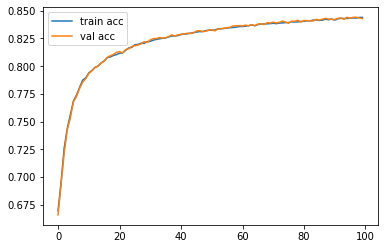

In [126]:
i,train=zip(*train_accs)
plt.plot(i,train,label="train acc")
i,val=zip(*val_accs)
plt.plot(i,val,label="val acc")
    
    
plt.legend()
plt.show()

In [12]:

preds = tf.nn.softmax(tf.matmul(X_test,W)+b)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_test, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
print(accuracy.numpy())

0.8304


5
[5]


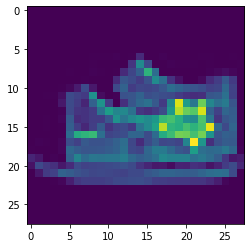

In [17]:
k=9999

plt.imshow(x_test[k].reshape(28,28))
print(y_test[k])

X_t1 = tf.Variable(x_test[k].reshape(1,-1),dtype=tf.float32)

preds= tf.nn.softmax(tf.matmul(X_t1,W)+b)
print(tf.argmax(preds,1).numpy())

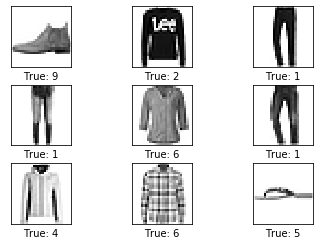

In [29]:
def plot_images(images, y, yhat=None):
    assert len(images) == len(y) == 9

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if yhat is None:
            xlabel = "True: {0}".format(y[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(y[i], yhat[i])

        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

#Get image from test set
images = x_test[0:9]

# Get the true classes for those images.
y = y_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, y=y)


#Second plot weights

def plot_weights(w=None):
    # Get the values for the weights from the TensorFlow variable.
    #TO DO ####

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    #TO DO## obtains these value from W
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


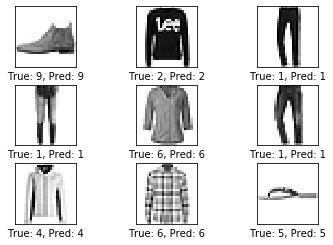

In [25]:
preds = tf.nn.softmax(tf.matmul(X_test,W)+b)
pred_classes = tf.argmax(preds, 1).numpy()[0:9]
plot_images(images=images, y=y,yhat=pred_classes)

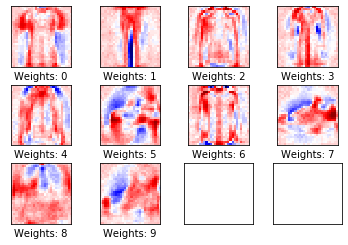

In [31]:
plot_weights(W.numpy())

In [84]:
def plot_clustered_weights(w=None):
    from sklearn.cluster import KMeans

    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(-1,1)
            kmeans = KMeans(n_clusters=10, random_state=random_seed).fit(image)
            # Set the label for the sub-plot.
            ax.set_xlabel("Clustered: {0}".format(i))
            u=kmeans.predict(image).reshape(img_shape)
            # Plot the image.
            ax.imshow(u,  cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


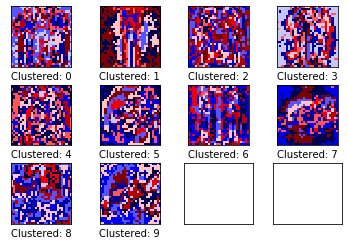

In [85]:
plot_clustered_weights(W.numpy())

# Performance over epochs

In [7]:
epoch_choices = [50,100,200]
epoch_accs={}
for epoch in epoch_choices:
    print(f"\nTraining for {epoch} epochs:\n")
    #Step 8: train the model for n_epochs times
    W, b = tf.Variable(tf.random.normal([784,10],stddev=0.01)), tf.Variable(tf.zeros([10]))
    best_val=-1
    best_W = tf.Variable([0])
    best_b = tf.Variable([0])
    for i in range(epoch):
        total_loss = 0
        n_batches = n_train//batch_size
        #print(W)
        for batch in range(n_batches):
            indices = np.random.choice(n_train,batch_size)
            X_batch = tf.Variable(x_train[indices],dtype=tf.float32)
            Y_batch = tf.one_hot(y_train[indices],10)
            #Optimize the loss function

            ################################
            ###TO DO#####
            ############

            with tf.GradientTape() as tape:

                #forward pass 
                logits = tf.matmul(X_batch, W)+ b
                current_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y_batch))+0.5 * lamda * tf.reduce_sum(tf.square(W))

              #evalute the gradient with the respect to the paramters
                dW,db = tape.gradient(current_loss, [ W, b])
                #print(dW)
            W.assign_sub(dW * learning_rate)
            b.assign_sub(db * learning_rate)
            total_loss+=current_loss

        #train accuracy
        logits=tf.matmul(X_train,W)+b
        preds = tf.nn.softmax(logits)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_train, 1))
        train_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        #val accuracy
        logits=tf.matmul(X_val,W)+b
        preds = tf.nn.softmax(logits)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_val, 1))
        val_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        if val_accuracy >= best_val:
            best_val=val_accuracy
            best_W = tf.Variable(W)
            best_b = tf.Variable(b)
        total_loss/=n_batches
        print(f"i={i}, loss = {total_loss:3f} acc={train_accuracy:5f} val_acc={val_accuracy:5f}",end='\r')

    #test accuracy
    logits=tf.matmul(X_test,best_W)+best_b
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_test, 1))
    test_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
    epoch_accs[epoch]=(best_val.numpy(),test_accuracy.numpy())



Training for 50 epochs:

i=49, loss = 0.510748 acc=0.833125 val_acc=0.832500
Training for 100 epochs:

i=99, loss = 0.466518 acc=0.844271 val_acc=0.844000
Training for 200 epochs:



[0.8199, 0.8298, 0.8354]


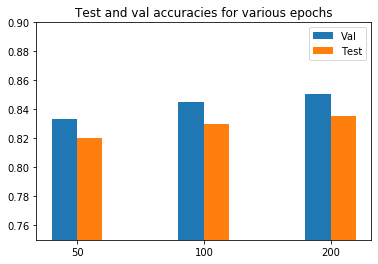

In [9]:
X=list(epoch_accs.keys())
val=[epoch_accs[i][0] for i in X]
test=[epoch_accs[i][1] for i in X]
print(test)
fig, ax = plt.subplots()

ind = np.arange(len(X))    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, val, width, bottom=0)

p2 = ax.bar(ind + width, test, width, bottom=0)

ax.set_title('Test and val accuracies for various epochs')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(tuple([str(each) for each in X]))
ax.set( ylim=(0.75, 0.9))

ax.legend((p1[0], p2[0]), ('Val', 'Test'))
ax.autoscale_view()

plt.show()


# Train-Val split variations

In [111]:
x,y= load_mnist(os.path.join("fashion_mnist","data","fashion"),"train")
x=x/255.0




# create testing Dataset and batch it
x_test,y_test = load_mnist(os.path.join("fashion_mnist","data","fashion"),"t10k")
x_test=x_test/255.0
print(x_test.shape,y_test.shape)
n_test = x_test.shape[0]

#convert data to tf vars
X_test  = tf.Variable(x_test,dtype=tf.float32)


Y_test  = tf.one_hot(y_test,10)

(10000, 784) (10000,)


In [112]:
val_splits=[0.1,0.2,0.33,0.5]
split_accs={}
for split in val_splits:
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=split, random_state=random_seed)
    n_train = x_train.shape[0]
    #convert data to tf vars
    X_train = tf.Variable(x_train,dtype=tf.float32)
    X_val   = tf.Variable(x_val,dtype=tf.float32)
    Y_train = tf.one_hot(y_train,10)
    Y_val   = tf.one_hot(y_val,10)
    
   
    

    print(f"\nTrain-val split ={1-split}/{split}:\n")
    #Step 8: train the model for n_epochs times
    W, b = tf.Variable(tf.random.normal([784,10],stddev=0.01)), tf.Variable(tf.zeros([10]))
    best_val=-1
    best_W = tf.Variable([0])
    best_b = tf.Variable([0])
    for i in range(50):
        total_loss = 0
        n_batches = n_train//batch_size
        #print(W)
        for batch in range(n_batches):
            indices = np.random.choice(n_train,batch_size)
            X_batch = tf.Variable(x_train[indices],dtype=tf.float32)
            Y_batch = tf.one_hot(y_train[indices],10)
            #Optimize the loss function

            ################################
            ###TO DO#####
            ############

            with tf.GradientTape() as tape:

                #forward pass 
                logits = tf.matmul(X_batch, W)+ b
                current_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y_batch))+0.5 * lamda * tf.reduce_sum(tf.square(W))

              #evalute the gradient with the respect to the paramters
                dW,db = tape.gradient(current_loss, [ W, b])
                #print(dW)
            W.assign_sub(dW * learning_rate)
            b.assign_sub(db * learning_rate)
            total_loss+=current_loss

        #train accuracy
        logits=tf.matmul(X_train,W)+b
        preds = tf.nn.softmax(logits)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_train, 1))
        train_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        #val accuracy
        logits=tf.matmul(X_val,W)+b
        preds = tf.nn.softmax(logits)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_val, 1))
        val_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

        if val_accuracy >= best_val:
            best_val=val_accuracy
            best_W = tf.Variable(W)
            best_b = tf.Variable(b)
        total_loss/=n_batches
        print(f"i={i}, loss = {total_loss:3f} acc={train_accuracy:5f} val_acc={val_accuracy:5f}",end='\r')

    #test accuracy
    logits=tf.matmul(X_test,best_W)+best_b
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_test, 1))
    test_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
    split_accs[split]=(best_val.numpy(),test_accuracy.numpy())




Train-val split =0.9/0.1:

i=49, loss = 0.502775 acc=0.834407 val_acc=0.837000
Train-val split =0.8/0.2:

i=49, loss = 0.508616 acc=0.832125 val_acc=0.831917
Train-val split =0.6699999999999999/0.33:

i=49, loss = 0.527345 acc=0.830100 val_acc=0.825960
Train-val split =0.5/0.5:



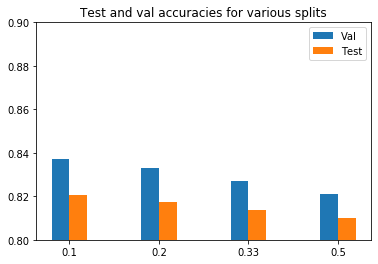

In [115]:
X=list(split_accs.keys())
val=[split_accs[i][0] for i in X]
test=[split_accs[i][1] for i in X]
fig, ax = plt.subplots()

ind = np.arange(len(X))    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, val, width, bottom=0)

p2 = ax.bar(ind + width, test, width, bottom=0)

ax.set_title('Test and val accuracies for various splits')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(tuple([str(each) for each in X]))
ax.set( ylim=(0.8, 0.9))

ax.legend((p1[0], p2[0]), ('Val', 'Test'))
ax.autoscale_view()

plt.show()

In [12]:
devices = ['/cpu:0','/gpu:0']
import time
for device in devices:
    with tf.device(device):
        tic=time.time()
        for i in range(10):
            total_loss = 0
            n_batches = n_train//batch_size
            #print(W)
            for batch in range(n_batches):
                indices = np.random.choice(n_train,batch_size)
                X_batch = tf.Variable(x_train[indices],dtype=tf.float32)
                Y_batch = tf.one_hot(y_train[indices],10)
                #Optimize the loss function

                ################################
                ###TO DO#####
                ############

                with tf.GradientTape() as tape:

                    #forward pass 
                    logits = tf.matmul(X_batch, W)+ b
                    current_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y_batch))+0.5 * lamda * tf.reduce_sum(tf.square(W))

                  #evalute the gradient with the respect to the paramters
                    dW,db = tape.gradient(current_loss, [ W, b])
                    #print(dW)
                W.assign_sub(dW * learning_rate)
                b.assign_sub(db * learning_rate)
                total_loss+=current_loss

            #train accuracy
            logits=tf.matmul(X_train,W)+b
            preds = tf.nn.softmax(logits)
            correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_train, 1))
            train_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

            #val accuracy
            logits=tf.matmul(X_val,W)+b
            preds = tf.nn.softmax(logits)
            correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_val, 1))
            val_accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
            
        toc=time.time()
        print(f"{device} took {toc-tic} s")

/cpu:0 took 20.660744667053223 s
/gpu:0 took 15.91443395614624 s
